In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [6]:
#create dataframe
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


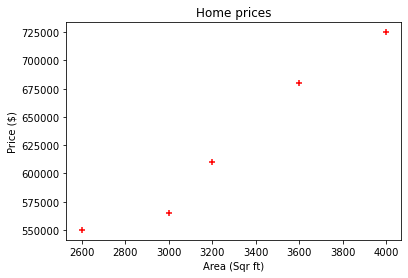

In [22]:
#make a scatter plot
x = df["area"]
y = df["price"]
plt.xlabel("Area (Sqr ft)")
plt.ylabel("Price ($)")
plt.title("Home prices")
plt.scatter(x, y, color="red", marker="+")

In [40]:
#create an object for linear regression
reg = linear_model.LinearRegression()
#train the linear regression model using the available datapoints
reg.fit(df[['area']], df.price) # first input the independent variable as a 2d array, then the independent variable


LinearRegression()

In [65]:
#predict the price of area 3300 sqr ft
reg.predict([[3300]])

array([628715.75342466])

In [53]:
#get the coeffiecient
reg.coef_

array([135.78767123])

In [60]:
#get the  y intercept
reg.intercept_

180616.43835616432

In [77]:
#predict the prices of many areas
areas_df = pd.read_csv("areas.csv")
areas_df
predicted_prices = reg.predict(areas_df)
predicted_prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [81]:
#add a column to the dataframe
areas_df['prices'] = predicted_prices
areas_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [88]:
#save the predicted values to csv file
areas_df.to_csv("predicted_prices.csv", index=False)

In [66]:
#get the score of the model
# reg.score(df.area, df.price)